In [1]:
import pycaret as pc
import os
import numpy as np
import pandas as pd
import autolingua

from pycaret.clustering import (setup, create_model, assign_model, plot_model, 
                                evaluate_model, save_model, load_model, pull)
# from pycaret.classification import (setup, create_model, plot_model, 
#                                     evaluate_model, save_model, load_model, 
#                                     pull, interpret_model)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [2]:
# Parent directory of autolingua package
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath(autolingua.__file__)))
parent_dir

'c:\\users\\alvar\\personal\\autolingua'

In [3]:
# Muestra en pantalla el archivo_resultado.
df = pd.read_excel(os.path.join(parent_dir, 'data', 'preseea', 'codificacion.xlsx'))
df.head()

,INFORMANTE,Minuto,CONTEXTO,Forma verbal analizada,Infinitivo,CONTEXTOS OBLIGATORIOS,Presencia,Persona del sujeto,Referente de sujeto,Ambigüedad fonética potencial,Especificidad,Modo,Tiempo verbal,Progresividad,Perfectividad,Ambigüedad morfologica,clase semantica del vb,ADESSE,Subtipo ADESSE,Tipo de clausula,Correferencialidad,Distancia de referente,Turno de habla,Perífrasis,Pronominal,Tipo de discurso,Longuitud de la formal verbal,Edad,Sexo,Nivel de estudios,CORPUS,Estatus,Edad ent,Grado de proximidad ent,Campo PROXIMIDAD,Sexo/Campo,norMA SEXO,S.Y.Z,S,entrevistador,Hablarbien,Modelolengua,Modelovariedad,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Posicion del sujeto respecto del verbo,Observaciones
0,MA_M31_015,10 al 15,"a mí me contestaban lo que yo hablaba en, en ...",hablaba,hablar,3,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,4,11.0,0.0,1.0,2,0.0,0.0,0.0,2.0,3.0,3.0,2.0,1,2,1,2.0,1.0,0.0,0.0,2,1.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN
1,MA_M31_015,10 al 15,"bueno, mira, yo, tengo mi hija ahora en <nomb...",estuve,estar,3,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3,7.0,0.0,0.0,2,0.0,0.0,0.0,2.0,3.0,3.0,2.0,1,2,1,2.0,1.0,0.0,0.0,2,1.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MA_H32_705,10 al 15,ørezo el rosario <fático = afirmación = E>.,rezo,rezar,3,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,4,11.0,0.0,0.0,1,0.0,0.0,0.0,2.0,2.0,3.0,1.0,2,1,M13,1.0,0.0,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MA_M21_069,Minutos 10 al 15,/ y ya últimamente pue<[s]> Ø estaba buscando ...,estaba buscando,buscar,3,1.0,3.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,6.0,1,3.0,0.0,0.0,1,0.0,2.0,0.0,2.0,6.0,2.0,1.0,1,1,M13,1.0,2.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MA_H13_732,10 al 15,también ø me están buscando,están buscadno,buscar,3,1.0,6.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,1,3.0,0.0,2.0,2,1.0,2.0,0.0,3.0,5.0,1.0,1.0,3,1,M13,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Cargar el archivo excel
archivo = pd.read_excel(os.path.join('..', '..', 'results', 'archivo_resultados.xlsx'),
                        sheet_name=None)
# Obtener la hoja "resultados" del archivo archivo_resultados.xlsx  
resultados = archivo['resultados']
# Filtra en la columna "GRUPOS DE MUESTRA" los valores 1 y crea un dataframe con ellos llamado "grupo1"
grupo1 = resultados[resultados['GRUPO DE MUESTRA'] == 1]
# Filtra en la columna "GRUPOS DE MUESTRA" los valores 2 y crea un dataframe con ellos llamado "grupo2"
grupo2 = resultados[resultados['GRUPO DE MUESTRA'] == 2]
# Filtra en la columna "GRUPOS DE MUESTRA" los valores 3 y crea un dataframe con ellos llamado "grupo3"
grupo3 = resultados[resultados['GRUPO DE MUESTRA'] == 3]
# Filtra en la columna "GRUPOS DE MUESTRA" los valores 2.1 y crea un dataframe con ellos llamado "grupo2.1"
grupo21 = resultados[resultados['GRUPO DE MUESTRA'] == "2.1"]
# Filtra en la columna "GRUPOS DE MUESTRA" los valores 3.1 y crea un dataframe con ellos llamado "grupo3.1"
grupo31 = resultados[resultados['GRUPO DE MUESTRA'] == "3.1"]
# Filtra en la columna "GRUPOS DE MUESTRA" los valores 3.2 y crea un dataframe con ellos llamado "grupo3.2"
grupo32 = resultados[resultados['GRUPO DE MUESTRA'] == "3.2"]

# Cuenta cuantos informantes hay en cada grupo
grupo21['GRUPO DE MUESTRA'].count()
grupo31['GRUPO DE MUESTRA'].count()
grupo32['GRUPO DE MUESTRA'].count()

print ('El grupo 1 tiene', grupo21['GRUPO DE MUESTRA'].count(), 'informantes')
print ('El grupo 2 tiene', grupo31['GRUPO DE MUESTRA'].count(), 'informantes')
print ('El grupo 3 tiene', grupo32['GRUPO DE MUESTRA'].count(), 'informantes')


El grupo 1 tiene 840 informantes
El grupo 2 tiene 1230 informantes
El grupo 3 tiene 690 informantes


In [13]:
# Añade a la tabla de contigencia anterior los porcentajes en forma que no sean decimales y que sumen 100 cada columna
# para cada grupo y guarda los resultados en un archivo excel con el nombre "tabla_contigencia_grupo1.xlsx" en la carpeta "results"
with pd.ExcelWriter(os.path.join('..', '..', 'results', 'tabla_contigencia_grupo1 5cat.xlsx')) as writer:
    round(pd.crosstab(grupo1['Respuestas 5 categorías'], [grupo1['Número de estímulo'], grupo1['TIPO DE EJEMPLO']], normalize='columns')*100, 2).to_excel(writer, sheet_name='grupo1', index=True, header=True, startrow=0)
    
#Guardar la tabla de contigencia anterior en un archivo excel con el nombre "tabla_contigencia_grupo1 5cat.xlsx" en la carpeta "results"
with pd.ExcelWriter(os.path.join('..', '..', 'results', 'tabla_contigencia_grupo3 5cat.xlsx')) as writer:
    round(pd.crosstab(grupo3['Respuestas 5 categorías'], [grupo3['Número de estímulo'], grupo3['TIPO DE EJEMPLO']], normalize='columns')*100, 2).to_excel(writer, sheet_name='grupo3', index=True, header=True, startrow=0)


In [14]:
# Cuenta cuantos informantes hay en cada grupo y los muestra en pantalla
resultados['GRUPO DE MUESTRA'].value_counts()


1      4350
2      3030
3      2130
3.1    1230
2.1     840
3.2     690
e       690
E       660
Name: GRUPO DE MUESTRA, dtype: int64

In [15]:
# Añade a la tabla de contigencia anterior los porcentajes en forma que no sean decimales y que sumen 100 cada columna
# para el grupo 3.2 y guarda los resultados en un archivo excel con el nombre "tabla_contigencia_grupo 3.2 5 cat.xlsx" en la carpeta "results"
with pd.ExcelWriter(os.path.join('..', '..', 'results', 'tabla_contigencia_grupo 2.1 3 cat.xlsx')) as writer:
    round(pd.crosstab(grupo21['Respuestas 3 categorías'], [grupo21['Número de estímulo'], grupo21['TIPO DE EJEMPLO']], normalize='columns')*100, 2).to_excel(writer, sheet_name='grupo21', index=True, header=True, startrow=0)

In [16]:
#Check the shape og the data   
print('The shape of the data is:', resultados.shape)

# Setup data for clustering using pycaret
clustering = setup(resultados, normalize = True,session_id = 123)

The shape of the data is: (13620, 28)


OSError: dlopen(/Users/albaseguralores/opt/anaconda3/envs/pycaret/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/albaseguralores/opt/anaconda3/envs/pycaret/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [ ]:
#Create a K-Means model 
kmeans = create_model('kmeans', num_clusters = 3)
print(kmeans)

RuntimeError: This function/method requires the users to run setup() first.
More info: https://pycaret.gitbook.io/docs/get-started/quickstart

In [ ]:
# Assign a model to the data
kmeans_results = assign_model(kmeans)
print(kmeans_results)
# Save the results a new excel file in the results folder 
kmeans_results.to_excel(os.path.join('..', '..', 'results', 'kmeans_results.xlsx'))



NameError: name 'kmeans' is not defined

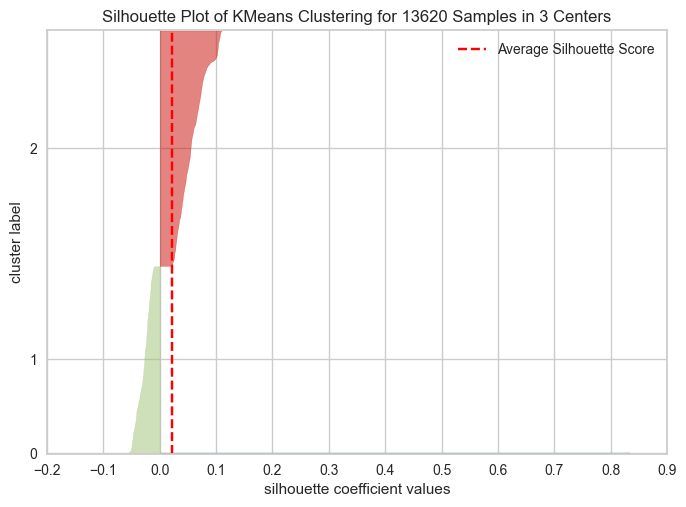

In [ ]:
#Plot the silhouette score for the model 
#plot_model(kmeans, plot = 'silhouette')


In [ ]:
#Plot the elbow curve for the model
#plot_model(kmeans, plot = 'elbow')


In [ ]:
# Muestra en pantalla el archivo cod.xlsx 
tmp = pd.ExcelFile('cod.xlsx')
data = pd.read_excel(tmp)
data.head()

,INFORMANTE,Minuto,CONTEXTO,Forma verbal analizada,Infinitivo,CONTEXTOS OBLIGATORIOS,Presencia,Persona del sujeto,Referente de sujeto,Ambigüedad fonética potencial,Especificidad,Modo,Tiempo verbal,Progresividad,Perfectividad,Ambigüedad morfologica,clase semantica del vb,ADESSE,Subtipo ADESSE,Tipo de clausula,Correferencialidad,Distancia de referente,Turno de habla,Perífrasis,Pronominal,Tipo de discurso,Longuitud de la formal verbal,Edad,Sexo,Nivel de estudios,CORPUS,Entrevistador,Estatus,Edad.1,Grado de proximidad,Campo,Sexo.1,Posicion del sujeto respecto del verbo,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Observaciones
0,MA_M32_043,10 al 15,me acuerdo/ claro/ yo me estaba acordando hoy/ si,me estaba acordando,acordar,3,0.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,6.0,1,3.0,0.0,0.0,2,0.0,2.0,1.0,1.0,3.0,3.0,2.0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MA_M23_029,10 al 15,muchos calabacines/ sandías/ cerezas/ estoy ap...,estoy aprendiendo,aprender,3,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,1,3.0,0.0,2.0,3,0.0,2.0,0.0,1.0,2.0,2.0,2.0,3,2,M23,1.0,1.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MA_H32_705,10 al 15,ørezo el rosario <fático = afirmación = E>.,rezo,rezar,3,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,4,11.0,0.0,0.0,1,0.0,0.0,0.0,2.0,2.0,3.0,1.0,2,1,M13,1.0,0.0,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MA_M21_069,Minutos 10 al 15,/ y ya últimamente pue<[s]> Ø estaba buscando ...,estaba buscando,buscar,3,1.0,3.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,6.0,1,3.0,0.0,0.0,1,0.0,2.0,0.0,2.0,6.0,2.0,1.0,1,1,M13,1.0,2.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MA_H13_732,10 al 15,también ø me están buscando,están buscadno,buscar,3,1.0,6.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,1,3.0,0.0,2.0,2,1.0,2.0,0.0,3.0,5.0,1.0,1.0,3,1,M13,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Nos quedamos únicamente con el contexto 3
data = data[data['CONTEXTOS OBLIGATORIOS'] == 3].reset_index(drop=True)
# Eliminamos algunas columnas sobrantes
eliminar = [x for x in data.columns if 'Unnamed' in x]
data = data.drop(eliminar, axis='columns')
# Eliminamos otras columnas que pueden despistarnos
eliminar2 = ['INFORMANTE', 
             'Minuto',
             'CONTEXTO ',
             'Forma verbal analizada',
             'Infinitivo',
             'CONTEXTOS OBLIGATORIOS']
data = data.drop(eliminar2, axis='columns')
# Eliminamos variables sociales y otras que no interesan
eliminar3 = data.columns[25:]
data = data.drop(eliminar3, axis='columns')
# Eliminamos los subtipos ADDESSE para evitar colinealidad
data = data.drop('Subtipo ADESSE', axis='columns')
# Pasar a entero, reducir uso de memoria
for col in data.columns:
    data[col] = data[col].astype('int8')

# Hacemos que el 1 sea presencia
data['Presencia'] = data['Presencia'].map({0:'a', 1:'b'}).map({'a':1, 'b':0})
# Hacemos la separación de los corpus
data_95 = data[data['CORPUS'] == 1].reset_index(drop=True)
data_15 = data[data['CORPUS'] == 2].reset_index(drop=True)
#save as an excel sheet
data_95.to_excel('data_95.xlsx')
data_15.to_excel('data_15.xlsx')


In [ ]:
# Setup data for clustering using pycaret for data_15
clustering = setup(data_15, normalize = True,session_id = 123)
#Create a K-Means model 
kmeans = create_model('kmeans', num_clusters = 5)
print(kmeans)

,Description,Value
0,Session id,123
1,Original data shape,"(3410, 24)"
2,Transformed data shape,"(3410, 24)"
3,Numeric features,24
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1191,283.3268,2.3030,0,0,0


KMeans(n_clusters=5, random_state=123)


In [ ]:
# Assign a model to the data
kmeans_results_15 = assign_model(kmeans)
print(kmeans_results_15)
#save as an excel sheet called kmeans_results_15.xlsx
kmeans_results_15.to_excel('kmeans_results_15.xlsx')

      Presencia  Persona del sujeto  Referente de sujeto  \
0             1                   1                    1   
1             0                   1                    1   
2             0                   3                    1   
3             0                   2                    1   
4             0                   4                    1   
...         ...                 ...                  ...   
3405          0                   1                    1   
3406          0                   1                    1   
3407          0                   1                    1   
3408          0                   3                    1   
3409          0                   1                    1   

      Ambigüedad fonética potencial  Especificidad  Modo  Tiempo verbal  \
0                                 2              1     0              2   
1                                 2              1     0              0   
2                                 1              1    

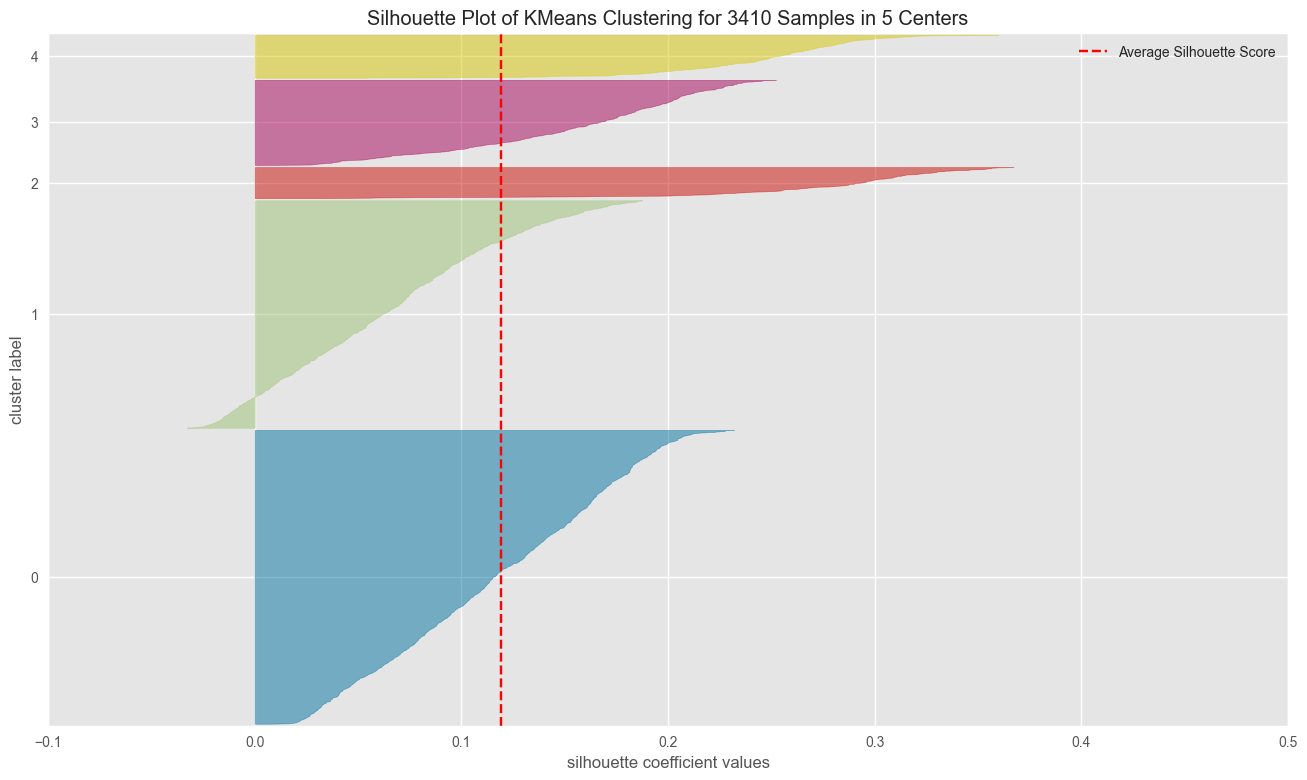

In [ ]:
#Plot the silhouette score for the model 
plot_model(kmeans, plot = 'silhouette')


In [ ]:
plot_model(kmeans)


In [ ]:
#Interpret the model and import the libraries
from pycaret.clustering import interpret_model

ImportError: cannot import name 'interpret_model' from 'pycaret.clustering' (/Users/albaseguralores/opt/anaconda3/envs/pycaret/lib/python3.8/site-packages/pycaret/clustering/__init__.py)

In [ ]:
#Describe the plot above 
plot_model(kmeans, plot = 'tsne')


In [ ]:

# Define categorical variable and target variable
cat_var = [x for x in data.columns if x != 'Presencia']
target_var = 'Presencia'
print (target_var)

NameError: name 'data' is not defined

In [ ]:
# Define categorical variable and target variable
cat_var = [x for x in data.columns if x != 'Presencia']
target_var = 'Presencia'
print(target_var)

# Set up correlation model
correlation = setup(data=data, target=target_var, categorical_features=cat_var, session_id=123, normalize=True, silent=True, html=False, log_experiment=True, experiment_name='correlation')


NameError: name 'data' is not defined

In [ ]:
# Initial septup for a correlation model using pycaret 
correlation = setup(data = data, y= target_var, categorical_features = cat_var, session_id = 123, normalize = True, silent = True, html = False, log_experiment = True, experiment_name = 'correlation')



NameError: name 'data' is not defined